### 1 - Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten

### 2- Loading the MNIST Dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### 3- Data Preprocessing

In [5]:
# Normalize pixel values to be between 0 and 1
train_images= train_images/255
test_images=test_images/255

In [6]:
train_images[:5]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

    

In [7]:
# One-hot encode the labels
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

#### 5- Custom Dense Layer: Examine the custom dense layer definition. This layer is used within the neural network architecture and allows you to specify the number of units and activation function.

In [8]:
from tensorflow import keras
class CustomDenseLayer(keras.layers.Layer):
    def __init__(self, units, activation=None):
        super(CustomDenseLayer, self).__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        self.w = self.add_weight("weight", (input_shape[-1], self.units), initializer="random_normal", trainable=True)
        self.b = self.add_weight("bias", (self.units,), initializer="zeros", trainable=True)

    def call(self, inputs):
        output = tf.matmul(inputs, self.w) + self.b
        if self.activation is not None:
            return self.activation(output)
        return output

### Step 6: Neural Network Architecture

In [9]:
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    CustomDenseLayer(128, activation=tf.nn.relu),
    #CustomDenseLayer(64, activation=tf.nn.relu),
    CustomDenseLayer(10, activation=tf.nn.softmax)
])

### Step 7: Custom Loss Function, # Step 8: Custom Accuracy Metric, # Step 9: Model Compilation

In [10]:
# Step 7: Custom Loss Function
def custom_sparse_categorical_crossentropy(y_true, y_pred):
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=tf.argmax(y_true, axis=1), logits=y_pred)
    return tf.reduce_mean(loss)

# Step 8: Custom Accuracy Metric
def custom_accuracy(y_true, y_pred):
    correct_predictions = tf.equal(tf.argmax(y_true, axis=1), tf.argmax(y_pred, axis=1))
    return tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

In [11]:
# Step 9: Model Compilation
model.compile(optimizer='adam',
              loss=custom_sparse_categorical_crossentropy,
              metrics=[custom_accuracy])


In [12]:
# Train the model
X_train= train_images
y_train= train_labels
X_test=test_images
y_test=test_labels
model.fit(X_train, y_train, epochs=10, batch_size=10, verbose=1)

Epoch 1/10
6000/6000 [==============================] - 24s 4ms/step - loss: 1.5565 - custom_accuracy: 0.9159
Epoch 2/10
6000/6000 [==============================] - 20s 3ms/step - loss: 1.5087 - custom_accuracy: 0.9554
Epoch 3/10
6000/6000 [==============================] - 20s 3ms/step - loss: 1.4969 - custom_accuracy: 0.9662
Epoch 4/10
6000/6000 [==============================] - 21s 4ms/step - loss: 1.4905 - custom_accuracy: 0.9722
Epoch 5/10
6000/6000 [==============================] - 23s 4ms/step - loss: 1.4862 - custom_accuracy: 0.9763
Epoch 6/10
6000/6000 [==============================] - 23s 4ms/step - loss: 1.4834 - custom_accuracy: 0.9787
Epoch 7/10
6000/6000 [==============================] - 20s 3ms/step - loss: 1.4811 - custom_accuracy: 0.9807
Epoch 8/10
6000/6000 [==============================] - 20s 3ms/step - loss: 1.4794 - custom_accuracy: 0.9825
Epoch 9/10
6000/6000 [==============================] - 20s 3ms/step - loss: 1.4786 - custom_accuracy: 0.9830
Epoch 10/1

In [13]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

313/313 [==============================] - 1s 2ms/step - loss: 1.4884 - custom_accuracy: 0.9726
Test Loss: 1.4884299039840698, Test Accuracy: 0.9726437926292419


In [14]:
y_predicted=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


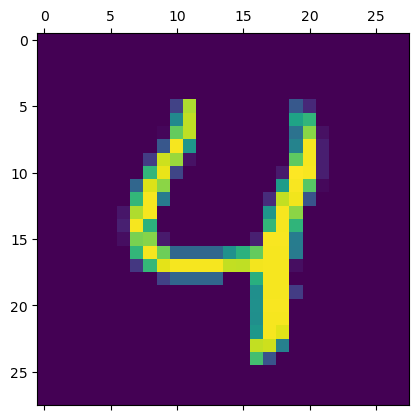

In [15]:
import matplotlib.pyplot as plt
plt.matshow(X_test[4])

In [16]:
import numpy as np
import math

In [17]:
np.argmax(y_predicted[4])

4

In [18]:
y_predicted_labels= [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]